# Exercises day 02 - 2


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

NUMS_TO_GENERATE = 10 ** 4

In [79]:
def exppdf(x : float, lam :float) -> float:
    """
        Exponential distribution probability density function.
        
        :param x: x value
        :param lam: lambda
        
        :return: probability density function value
    """
    return  lam * np.exp(-lam*x)


def normpdf(x : float, mu : float, sigma : float) -> float:
    """
        Normal distribution probability density function.
        
        :param x: x value
        :param mu: mean
        :param sigma: standard deviation
        
        :return: probability density function value
    """
    return 1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-1.0 / 2 * ((mu - x) / sigma)**2)


def compute_confidence_interval_sample(data : list[float], confidence : float = 0.95, normal : bool = False ) -> list[float]:
    """
        Compute the confidence interval of the mean of the data.
        :param data: list of data
        :param confidence: confidence level
        :param normal: whether of not the data is assumed normal distributed
        
        :return: confidence interval of the mean of the data
    """
    N = len(data)
    alpha = 1 - confidence

    data = np.array(data)
    if normal:
        conf_mean = [data.mean() - data.std()/np.sqrt(N) * scipy.stats.t.cdf(1-alpha/2, N - 1), data.mean() + data.std()/np.sqrt(N) * scipy.stats.t.cdf(1-alpha/2, N - 1)]
    else:
        conf_mean = [data.mean() - confidence * data.std()/np.sqrt(N), data.mean() + confidence * data.std()/np.sqrt(N)]
    
    return conf_mean

def compute_confidence_interval_var(data : list[float], confidence : float = 0.95) ->list[float]:
    """
        
    """
    N = len(data)
    alpha = 1 - confidence
    data = np.array(data)
    
    df = N - 1
    conf_var = [df*data.var() / scipy.stats.chi2.cdf(1-confidence/2, df), scipy.stats.t.cdf(confidence/2, N - 1)]
    print(f"chi_cdf left : {scipy.stats.chi2.cdf(1-alpha/2, df)}, chi_cdf right : {scipy.stats.chi2.cdf(1-alpha/2, df)}")
    
    return conf_var

## Ex01
**Generate simulated values from different distributions**

### a) Exponential


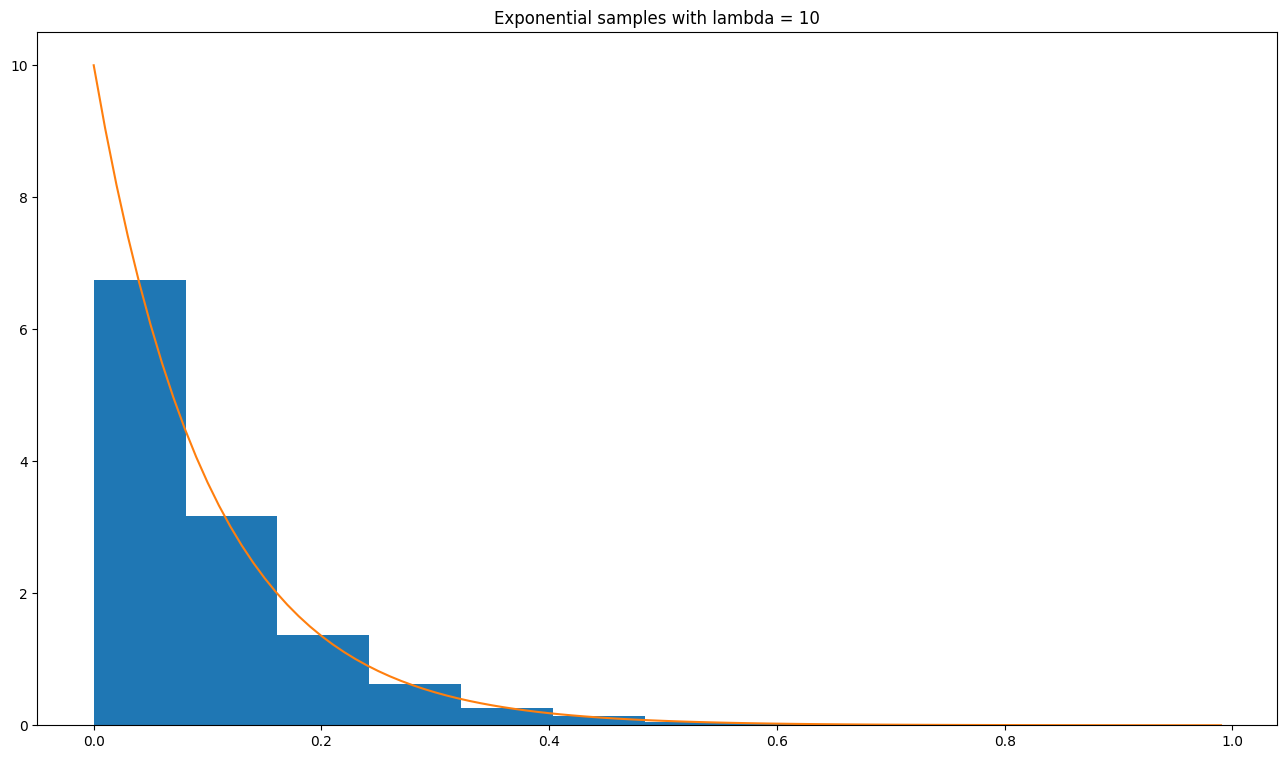

In [31]:
# Sample Uniform distribution
U = np.random.uniform(0.0, 1.0, NUMS_TO_GENERATE)

# Exponential distribution
lambda_ = 10 
X = -np.log(U)/lambda_ 

# Plots
XX =np.arange(0, 1, 0.01)
Y=np.array([exppdf(x, lambda_) for x in XX])
plt.figure(figsize=(16, 9))
plt.title(f"Exponential samples with lambda = {lambda_}")
plt.hist(X, density=True)
plt.plot(XX, Y)
plt.show()

### b) Normal (Box-Mueller)

In [32]:
def box_mueller_adv(num_samples : int) -> list[float]:
    """
        Here we used the smart method which Bo introduced on slide 16 of the third lecture.
        (See slide 16 of 'slide4m1.pdf')
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: number of samples to generate.
        
        :return: list of samples.
    """
    counter = 0
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, num_samples)
    V = np.random.uniform(-1.0, 1.0, (2, num_samples))
    
    i = 0
    while counter < num_samples:
        V_1 = V[0][i]
        V_2 = V[1][i]
        R_squared = V_1**2 + V_2**2
        if R_squared <= 1:
            # We accept the samples (and calculate them as per slides)
            coeff = np.sqrt(-2 * np.log(U_1[i]))
            R = np.sqrt(R_squared)
            Z_1 = coeff * V_1 / R 
            Z_2 = coeff * V_2 / R
            accepted.append(Z_1); accepted.append(Z_2)
            counter += 2
        if i == num_samples - 1:
            # We generate new samples if we run out
            i = 0
            U_1 = np.random.uniform(0.0, 1.0, num_samples)
            V = np.random.uniform(-1.0, 1.0, (2, num_samples))
        i += 1


    return accepted
        


**Plotting**

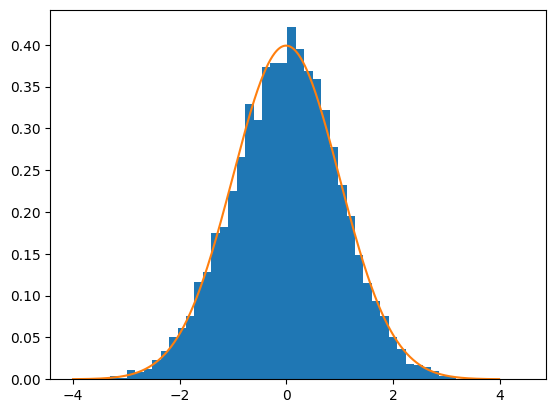

In [33]:
X = np.array(box_mueller_adv(NUMS_TO_GENERATE))

XX=  np.arange(-4, 4, 0.01)
Y=np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()

In [34]:
def box_mueller(num_samples : int) -> list[float]:
    """
        Generate num_samples samples from a standard normal distribution, by the Box-Mueller method.
        NOTE: due to the nature of finding two samples at a time, the number of samples must be even.
        If the number of samples isn't even then the function will return a list of num_samples + 1.
        (e.g if num_samples = 5, then the function will return 6 samples)
        
        :param num_samples: The number of samples to generate.
        
        :return: A list of num_samples samples from a standard normal distribution.
    """
    n = (num_samples // 2 + 1)
    
    accepted = []
    U_1 = np.random.uniform(0.0, 1.0, n)
    U_2 = np.random.uniform(0.0, 1.0, n)
    
    for i in range(n):
        Z_1 = np.sqrt(-2 * np.log(U_1[i])) * np.cos(2 * np.pi * U_2[i])
        Z_2 = np.sqrt(-2 * np.log(U_1[i])) * np.sin(2 * np.pi * U_2[i])
        
        accepted.append(Z_1); accepted.append(Z_2)
        

    return accepted


**Plotting**

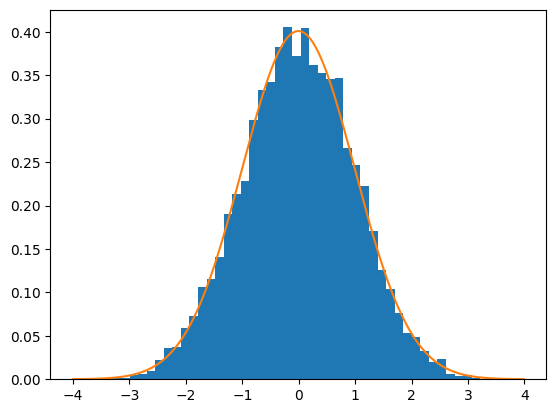

In [35]:
NUMS_TO_GENERATE = 10**4
X = np.array(box_mueller(NUMS_TO_GENERATE))

XX =  np.arange(-4, 4, 0.01)
Y = np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()

Normal distribution with central limit theorem. 

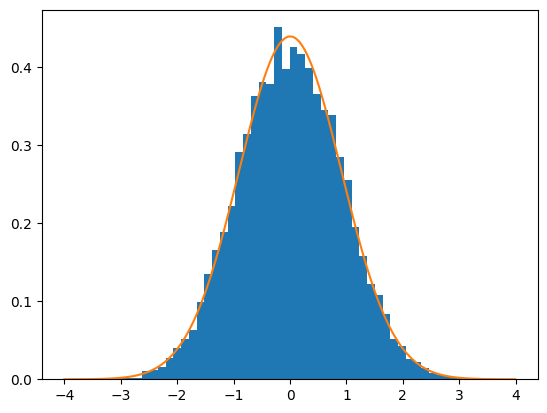

In [36]:
def norm_CLT(num_samples, n):
    # Sample Uniform distribution
    U = np.random.uniform(0.0, 1.0, (n, num_samples))

    X = np.sum(U, axis=0) - n/2

    return X

n = 10

X = norm_CLT(NUMS_TO_GENERATE,n)

# Plotting
XX=  np.arange(-4, 4, 0.01)
Y=np.array([normpdf(x, X.mean(), X.std()) for x in XX])

plt.figure()
plt.hist(X, density=True, bins=50)
plt.plot(XX,Y)
plt.show()



### c) Pareto distribution

In [37]:
def paretoPDF(x, k, beta):
    # Support [beta,inf[
    return (k*beta)/(x**(k+1))

def pareto_samples(k, beta, num_samples: int):
    U = np.random.uniform(0.0, 1.0,num_samples)
    X = beta*(U**(-1/k))

    return X

**Plotting**

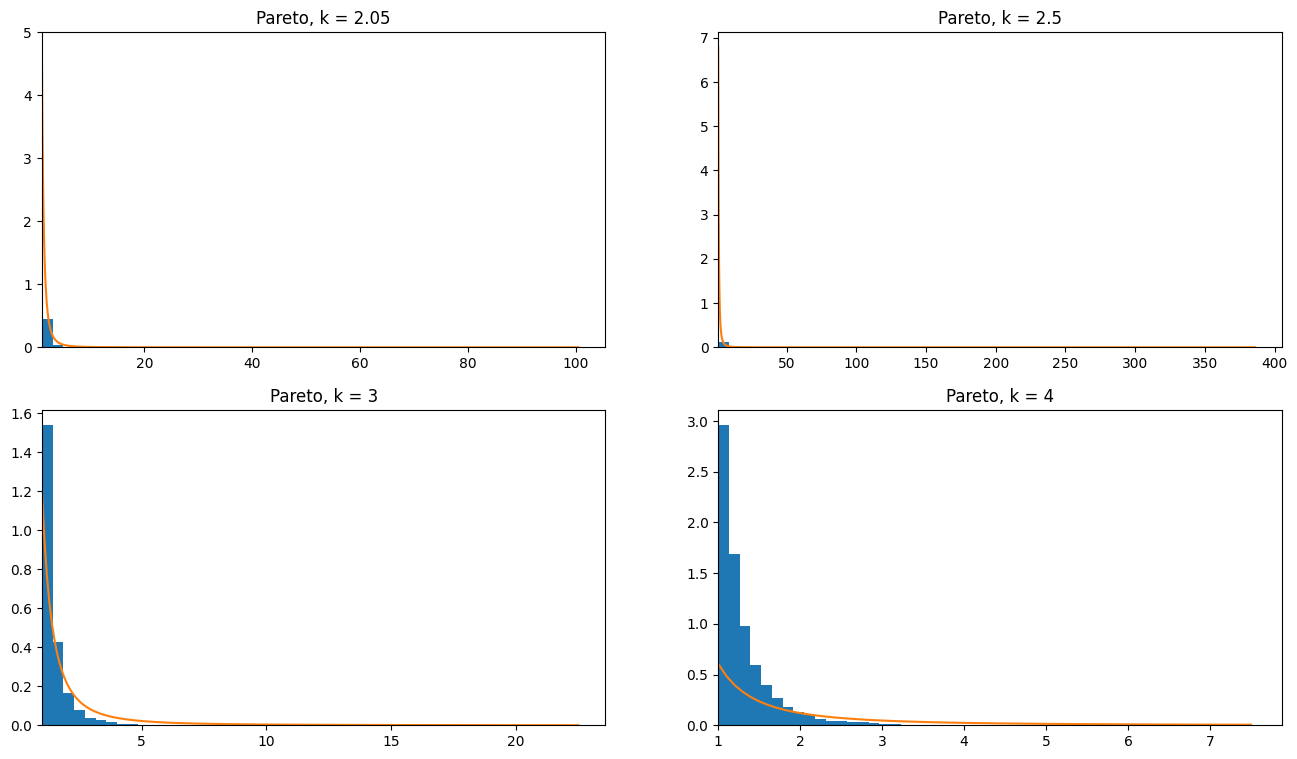

In [38]:
beta = 1
K = [2.05, 2.5, 3, 4]


plt.figure(figsize=(16, 9))
for i,k in enumerate(K):
    plt.subplot(2, 2, i + 1)
    X = pareto_samples(k,beta, NUMS_TO_GENERATE)

    XX=  np.arange(beta, X.max(), 0.1)
    Y=np.array([paretoPDF(x, X.mean(), X.std()) for x in XX])
 
    plt.title(f"Pareto, k = {k}")
    plt.hist(X,bins=50, density=True)
    plt.xlim(left=beta)
    plt.plot(XX,Y)

plt.show()

## Ex02: Pareto distribution

**For the Pareto distribution with support on $[\beta, \infty[$ compare mean value and variance, with analytical results, which can be calculated as E(X) = 'stuff'.
Var(X) = 'stuff'.**

We have by common decision (and by looking at slides) agreed that $k$ may assum real values.

In [39]:
NUM_Ks = 100
NUM_BETAs = 100

ks = np.linspace(2.05, 4, NUM_Ks)
betas = np.linspace(1, 10, NUM_BETAs)

pareto_means = np.zeros((NUM_Ks, NUM_BETAs))
pareto_vars = np.zeros_like(pareto_means) # <-- damn this is new, hella cool B)

pareto_E = lambda k, beta: beta * (k / (k - 1))
pareto_Var = lambda k, beta: beta**2 * (k) / ((k-1)**2 * (k-2))


for i, k in enumerate(ks):
    for j, beta in enumerate(betas):
        X = pareto_samples(k, beta, NUMS_TO_GENERATE)
        pareto_means[i, j] = np.abs(pareto_E(k, beta) -  X.mean())

        pareto_vars[i,j] = np.abs(pareto_Var(k, beta) - X.var())


**Plotting**

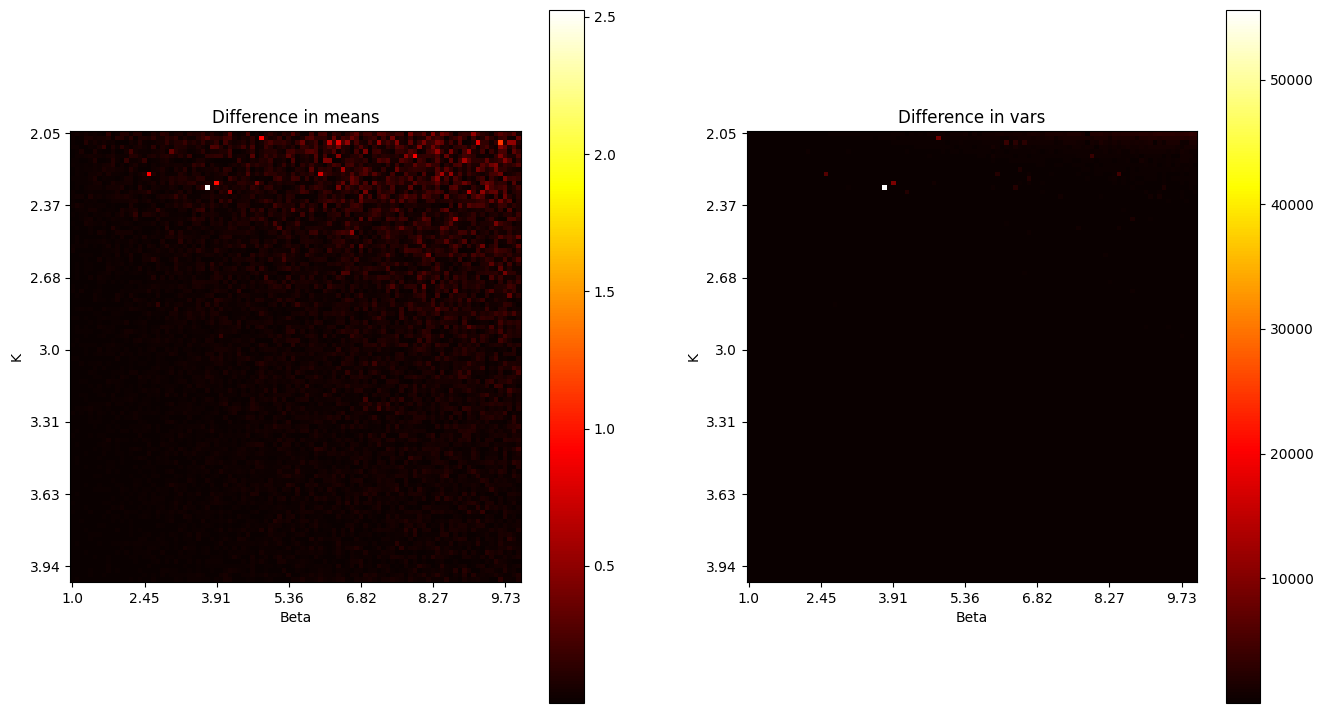

In [40]:
NUM_TICKS = 6
TICKS_ROUNDING = 2
TICKS_DIVISOR_X = NUM_Ks // NUM_TICKS
TICKS_DIVISOR_Y = NUM_BETAs // NUM_TICKS

xs = [round(beta, TICKS_ROUNDING) for beta in betas[::TICKS_DIVISOR_X]]
x_locs = range(NUM_Ks)[::TICKS_DIVISOR_X]

ys = [round(k, TICKS_ROUNDING) for k in ks[::TICKS_DIVISOR_Y]]
y_locs = range(NUM_BETAs)[::TICKS_DIVISOR_Y]

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.title("Difference in means")
#plt.contour([ks,betas],pareto_mean)
plt.imshow(pareto_means, cmap='hot', interpolation='nearest')
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.subplot(1, 2, 2)  
plt.title("Difference in vars")   
plt.imshow(pareto_vars, cmap='hot', interpolation='nearest') 
plt.xticks(x_locs, xs)
plt.yticks(y_locs, ys)
plt.xlabel("Beta")
plt.ylabel("K")
plt.colorbar()

plt.show()  

Our sampled mean fits quite well with the theoretical expect value. There are some noticable differences, particularly for low values of $k$ and high values of $\beta$.

However, the sampled variance Vs. the theorical variance has some serious outliers. It is interesting to note that these outliers can be located in the same region as for the expected value i.e. low values of $k$ and high values of $\beta$.

## Ex03: Normal dsitribution

**For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.**

### First for mean

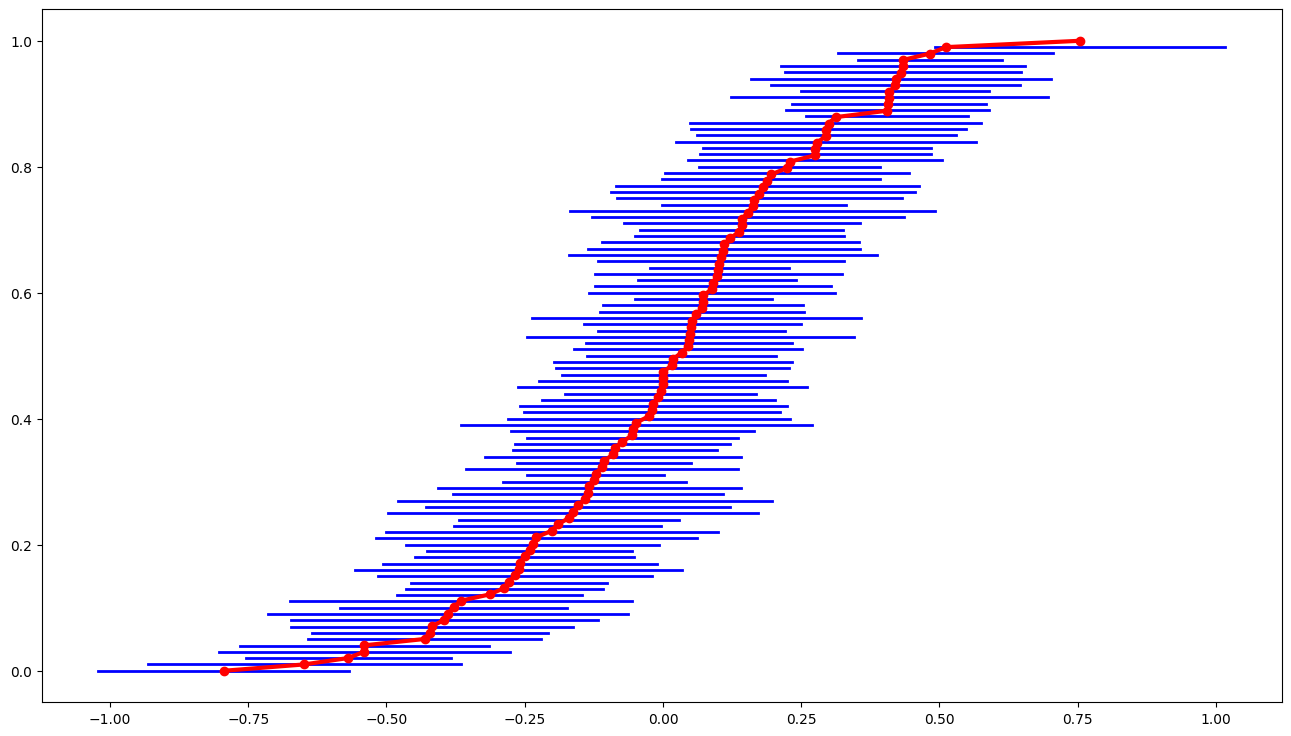

In [71]:
NUMS_TO_GENERATE = 10
NUMS_EXPERIMENT = 100

confidence = 0.95
conf_intervals = []
for n in range(NUMS_EXPERIMENT):
    X = np.array(box_mueller(NUMS_TO_GENERATE))
    conf_mean = compute_confidence_interval_sample(data = X, confidence = confidence, normal = True)
    conf_intervals.append((conf_mean, X.mean()))

# Plotting the sorted confidence intervals
conf_intervals.sort(key = lambda row: row[1])

plt.figure(figsize=(16, 9))
for indx, (interval, _) in enumerate(conf_intervals):
    indx /= 100
    plt.plot([interval[0], interval[1]], [indx, indx], color='b', linewidth=2)

means = [mean for _, mean in conf_intervals]
plt.plot(means, np.linspace(0, 1, 100), 'r-o', linewidth=3)
plt.show()

What might not first be totally intuitive, but what is very apparent, when plotting, is that these 100 means are normally distributed.
The plot was generated by generating $100$ confidence intervals, sorting them by their mean, and then plotting them along the x axis, seperated by an incrementing y.

### Secondly for the variance

Iteration: 0
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 1
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 2
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 3
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 4
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 5
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 6
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 7
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 8
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 9
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 10
chi_cdf left : 4.430108473457904e-05, chi_cdf right : 4.430108473457904e-05
Iteration: 11
chi_cd

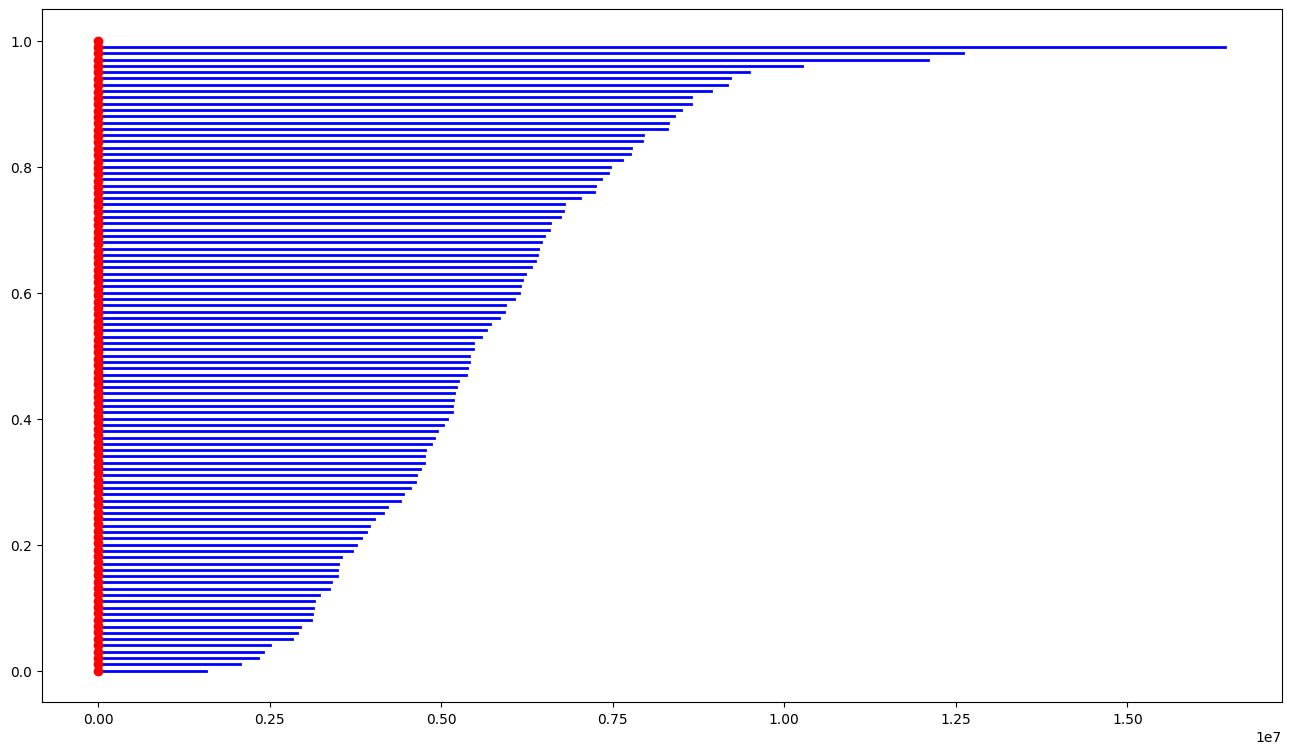

In [80]:
conf_intervals_var = []
for n in range(NUMS_EXPERIMENT):
    print(f"Iteration: {n}")
    X = np.array(box_mueller(NUMS_TO_GENERATE))
    conf_mean = compute_confidence_interval_var(data = X)
    conf_intervals_var.append((conf_mean, X.var()))

# Plotting the sorted confidence intervals
conf_intervals_var.sort(key = lambda row: row[1])

plt.figure(figsize=(16, 9))
for indx, (interval, _) in enumerate(conf_intervals_var):
    indx /= 100
    plt.plot([interval[0], interval[1]], [indx, indx], color='b', linewidth=2)

variances = [var for _, var in conf_intervals_var]
plt.plot(variances, np.linspace(0, 1, 100), 'r-o', linewidth=3)
plt.show()

In [75]:
print(variances)

[0.2127323639446965, 0.2737927120105415, 0.3447420003530605, 0.36798182018436787, 0.3683792957710064, 0.3900847468542168, 0.40097704906156517, 0.42320501180582343, 0.43067262987521177, 0.45062001021152565, 0.4549852835925632, 0.478053123919796, 0.4951584993615243, 0.5168491986594281, 0.5205001773091745, 0.5218311987887113, 0.526914731370428, 0.5336357925971984, 0.5389782519015638, 0.5438744659076334, 0.5550822742434114, 0.5685027064282878, 0.5797794748125975, 0.5800383260697641, 0.5983160305945538, 0.6135288833313378, 0.61888600616505, 0.625543561399691, 0.6259917640122953, 0.6625797850868649, 0.6878972274912482, 0.7011394767006635, 0.7055616467589263, 0.7105449565629124, 0.7215646112936942, 0.7317113344204499, 0.7362596929989959, 0.7438672835029884, 0.7576582063873047, 0.7672383574614093, 0.7673452845119616, 0.771939071127068, 0.7740544976982178, 0.7749758883980906, 0.7764821972166481, 0.7769607879338278, 0.787876086030541, 0.7914452147151777, 0.7986279921787292, 0.8094834700840855, 0

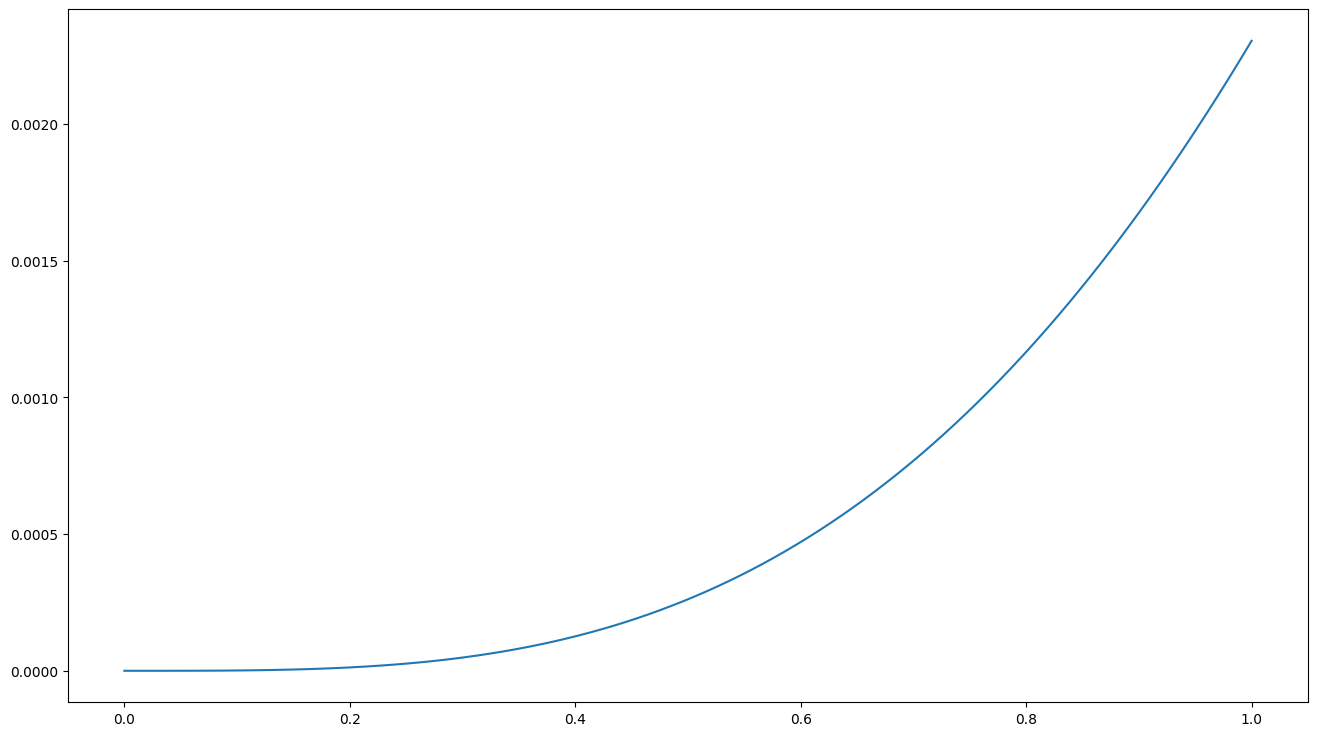

In [83]:
plt.figure(figsize=(16, 9))
X = np.linspace(0, 1, 100)
plt.plot(X, scipy.stats.chi2.pdf(X, df = 9))
plt.show()